In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns

In [2]:
# Load data
# Mutation data only contains HRR genes
clinical = pd.read_csv('../data/gene_expression/prepared_data/clinical_BRCA.csv', sep = ',', header = 0, index_col=0)
mutation_data = pd.read_csv('../data/mutations/mutations.txt', sep = '\t',header = 0)

In [3]:
def check_genes(row):
    '''
    Checks if there is any mutation (something else than 'WT') in the given row
    Input:
    row (dataframe row)
    Output: (int) 0 if there is no mutation, 1 if there is at least 1 mutation
    '''
    genes = row[2:]
    return 0 if all(gene == 'WT' for gene in genes) else 1

In [5]:
#Checking how many cases are a match between the clinical and mutation data

cases_m = list(mutation_data['SAMPLE_ID'])
cases_clinical = list(clinical.index.values)

set1 = set(cases_m)
set2 = set(cases_clinical)

common_elements = set1.intersection(set2)

print(len(common_elements))

739


In [7]:
# Set rownames in mutation data
# Check if there are any mutation per case (check_genes function)
# Add new column to clinical data indicating if there is a mutation in any of the HRR genes
mutation_new = mutation_data.set_index('SAMPLE_ID')
mutation_new['mutation_hrr'] = mutation_new.apply(check_genes, axis=1)
mutations_hrr = mutation_new[['mutation_hrr']]
merged_df = pd.merge(clinical, mutations_hrr, how='inner', left_index=True, right_index=True)

# Mutation HRDsum correlation

Scatter-, box- and violin-plot shwoing the correlation between HRDsum and mutations

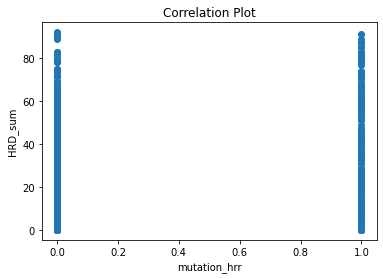

In [10]:
# Scatter plot HRDsum versus mutation in any HRR gene
plt.scatter(merged_df['mutation_hrr'], merged_df['HRD_sum'])

# Set plot labels
plt.xlabel('mutation_hrr')
plt.ylabel('HRD_sum')
plt.title('Correlation Plot')

# Show plot
plt.show()

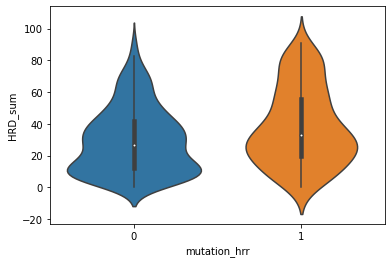

In [20]:
# Violin plot HRDsum versus mutation in any HRR gene
plt.figure(facecolor=(1, 1, 1))
df_bc = merged_df.loc[:, ['mutation_hrr', 'HRD_sum']]

# Plot a violin plot
sns.violinplot(x="mutation_hrr", y="HRD_sum", data=df_bc)
plt.savefig("../data/figures/BRCA_cohort/mutation_hrdsum_correlation.png", bbox_inches='tight')

<AxesSubplot:xlabel='mutation_hrr', ylabel='HRD_sum'>

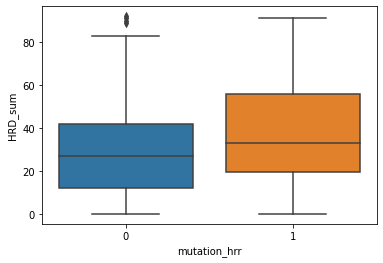

In [46]:
# Box plot HRDsum versus mutation in any HRR gene
sns.boxplot(x="mutation_hrr", y="HRD_sum", data=df_bc)

In [12]:
# Calculating the correlation between HRDsum and mutation status using Spearman
correlation, p_value = spearmanr(merged_df['mutation_hrr'], merged_df['HRD_sum'])

# Print the correlation coefficient and p-value
print(f"The correlation coefficient between the two columns is: {correlation}")
print(f"The p-value of the correlation is: {p_value}")

The correlation coefficient between the two columns is: 0.1592282427162163
The p-value of the correlation is: 1.3676157535014772e-05


# Mutation LOH correlation

Violinplot showing the correlation between LOH and mutations

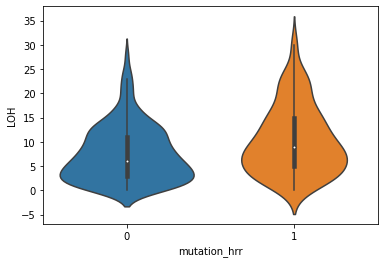

In [21]:
# Violin plot LOH versus mutation in any HRR gene
plt.figure(facecolor=(1, 1, 1))
df_bc = merged_df.loc[:, ['mutation_hrr', 'LOH']]

# Plot a violin plot
sns.violinplot(x="mutation_hrr", y="LOH", data=df_bc)
plt.savefig("../data/figures/BRCA_cohort/mutation_LOH_correlation.png", bbox_inches='tight')

In [14]:
# Calculating the correlation between LOH and mutation status using Spearman
correlation, p_value = spearmanr(merged_df['mutation_hrr'], merged_df['LOH'])

# Print the correlation coefficient and p-value
print(f"The correlation coefficient between the two columns is: {correlation}")
print(f"The p-value of the correlation is: {p_value}")

The correlation coefficient between the two columns is: 0.18052148903238446
The p-value of the correlation is: 7.823204909617891e-07


# Mutation LST correlation

Violinplot showing the correlation between LST and mutations

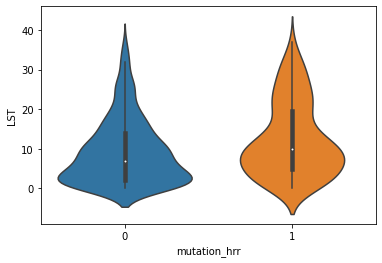

In [22]:
# Violin plot LST versus mutation in any HRR gene
plt.figure(facecolor=(1, 1, 1))
df_bc = merged_df.loc[:, ['mutation_hrr', 'LST']]

# Plot a violin plot
sns.violinplot(x="mutation_hrr", y="LST", data=df_bc)
plt.savefig("../data/figures/BRCA_cohort/mutation_LST_correlation.png", bbox_inches='tight')

In [16]:
# Calculating the correlation between LST and mutation status using Spearman
correlation, p_value = spearmanr(merged_df['mutation_hrr'], merged_df['LST'])

# Print the correlation coefficient and p-value
print(f"The correlation coefficient between the two columns is: {correlation}")
print(f"The p-value of the correlation is: {p_value}")

The correlation coefficient between the two columns is: 0.15827187468333992
The p-value of the correlation is: 1.54242742572226e-05


# Mutation TAI correlation

Violinplot showing the correlation between TAI and mutations

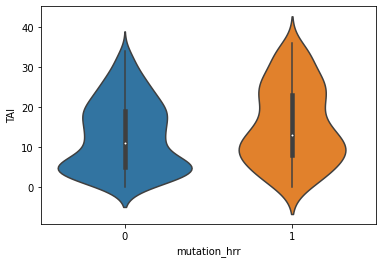

In [23]:
# Violin plot TAI versus mutation in any HRR gene
plt.figure(facecolor=(1, 1, 1))
df_bc = merged_df.loc[:, ['mutation_hrr', 'TAI']]

# Plot a violin plot
sns.violinplot(x="mutation_hrr", y="TAI", data=df_bc)
plt.savefig("../data/figures/BRCA_cohort/mutation_TAI_correlation.png", bbox_inches='tight')

In [18]:
# Calculating the correlation between TAI and mutation status using Spearman
correlation, p_value = spearmanr(merged_df['mutation_hrr'], merged_df['TAI'])

# Print the correlation coefficient and p-value
print(f"The correlation coefficient between the two columns is: {correlation}")
print(f"The p-value of the correlation is: {p_value}")

The correlation coefficient between the two columns is: 0.13093428782057967
The p-value of the correlation is: 0.00035870310447382725
